# Term Deposit Sales
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Domain
Marketing

#### Attribute Information:
Input variables:

Bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

#### Univariate analysis (Exploratory data quality report reflecting the following)  (12 marks)

1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
2. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
3. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [315]:
import warnings
warnings.filterwarnings('ignore')

In [379]:
# Importing basic python libraries and libraries for Decision Tree 

%matplotlib inline
import pandas as pd                                             # library for working with dataframes
from sklearn.tree import DecisionTreeClassifier                 # library for working with Decision Tree

import numpy as np                                              # library for working with arrays
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt                                 # library for data visualization
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

import seaborn as sns                                           # libaray for data visualization 
from sklearn.model_selection import train_test_split            # library for training and testing data

from sklearn.feature_extraction.text import CountVectorizer     # Since Decision Tree does not take strings as input for fitting the model

In [317]:
# Reading data from data sheet

df=pd.read_csv("bank-full.csv") 

In [318]:
# Display the data upto 10 rows

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [319]:
# Printing the data types and description of the independent attributes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [320]:
# Displaying and checking datatypes of all the 17 columns 
df.info()

# There is no null value in this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [321]:
# Checking the no. of columns and rows in the data set
df.shape

(45211, 17)

In [322]:
# Display the Statistical Summary of the data.
df.describe().transpose()

# Here balance and duration are the outliers based on their min and max values.

,count,mean,std,min,25%,50%,75%,max
age,45211.00,40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,45211.00,1362.27,3044.77,-8019.00,72.00,448.00,1428.00,102127.00
day,45211.00,15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,45211.00,258.16,257.53,0.00,103.00,180.00,319.00,4918.00
campaign,45211.00,2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,45211.00,40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,45211.00,0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [323]:
# Cheking for any null values in the data set.
df.isnull().values.any()

False

In [324]:
df.isnull().sum()

# There is no null data in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

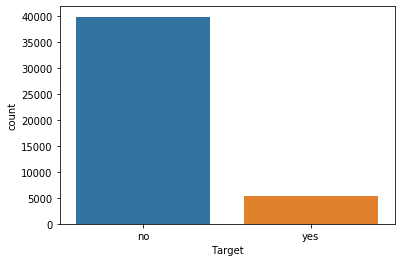

In [325]:
# Performing Count plot for our target variable of the dataset.
sns.countplot(df['Target'])

# This says in the past most of the customers did not have/prefer Term Deposit.

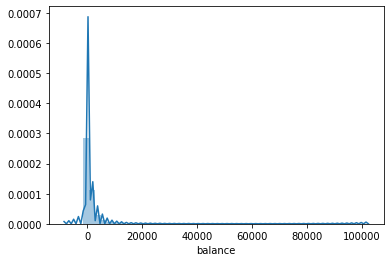

In [326]:
# We can take a look at distribution based on the value in balance column
sns.distplot(df['balance'])

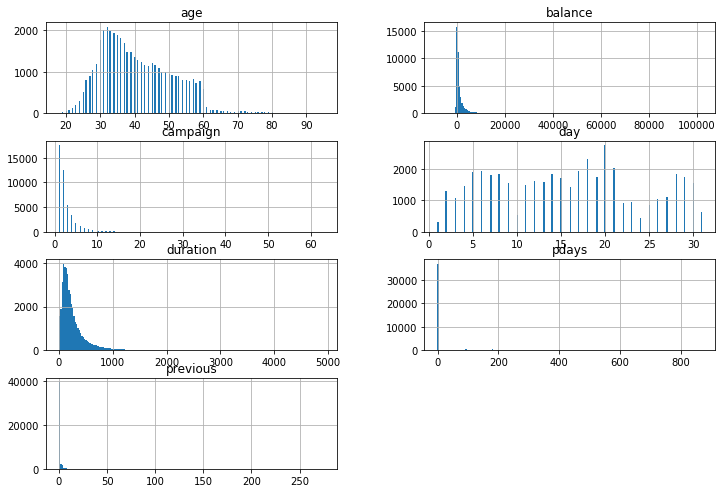

In [327]:
# Histogram of the 7 columns having datatype int
columns = list(df)[0:-1] 
df[columns].hist(stacked=False, bins=200, figsize=(12,30), layout=(14,2));

#Skewness for all the variables are majorly on the right side.

#### Multivariate analysis (8 marks)
1. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
2. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [328]:
# Correlation matrix 
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


In [329]:
# Heatmap for Correlation between columns having int data types
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

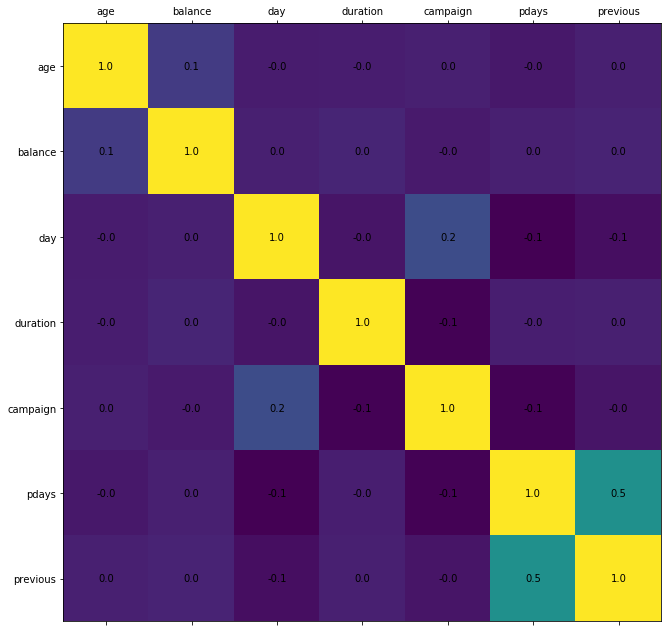

In [330]:
plot_corr(df)

# The plot with yellow colour represents maximum correlation and blue colour represents minimum correlation. 
# We can see none of variable have correlation with any other variables.

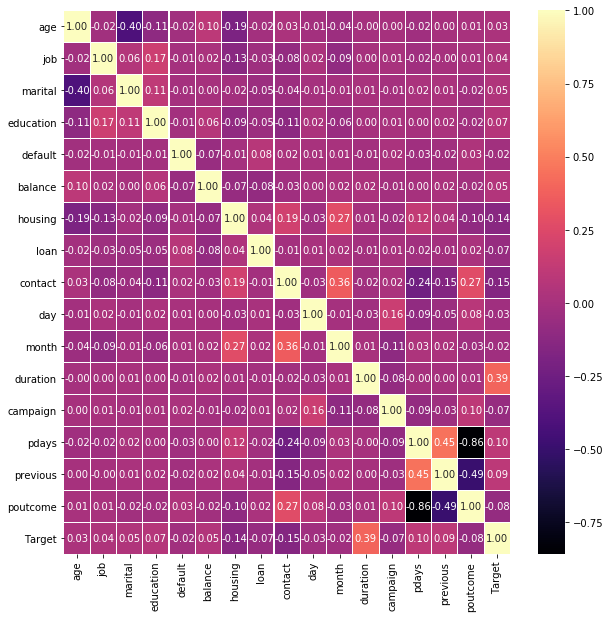

In [314]:
# Heatmap for Correlation between columns having int data type
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),ax=ax, annot=True, linewidths=0.1, fmt='.2f', cmap="magma")   
plt.show()

# Basically there is no correlation in data.

In [ ]:
# Target has corelation with contacts

Text(0.7, 107.5, 'IQR')

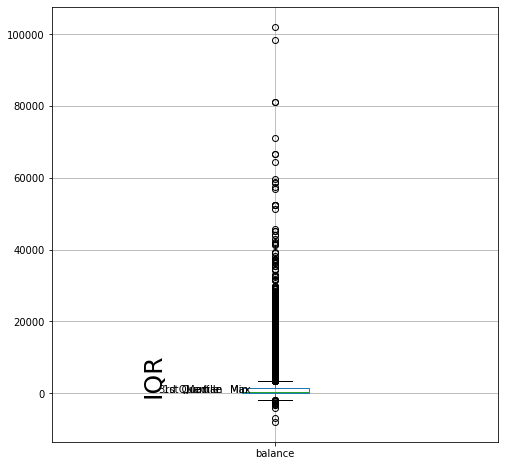

In [331]:
df.boxplot(column="balance",return_type='axes',figsize=(8,8))

# Create text
plt.text(x=0.74, y=112.00, s="3rd Quartile")
plt.text(x=0.8, y=107.00, s="Median")
plt.text(x=0.75, y=103.00, s="1st Quartile")
plt.text(x=0.9, y=92.00, s="Min")
plt.text(x=0.9, y=120.00, s="Max")
plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

# We have a lot of outliers.

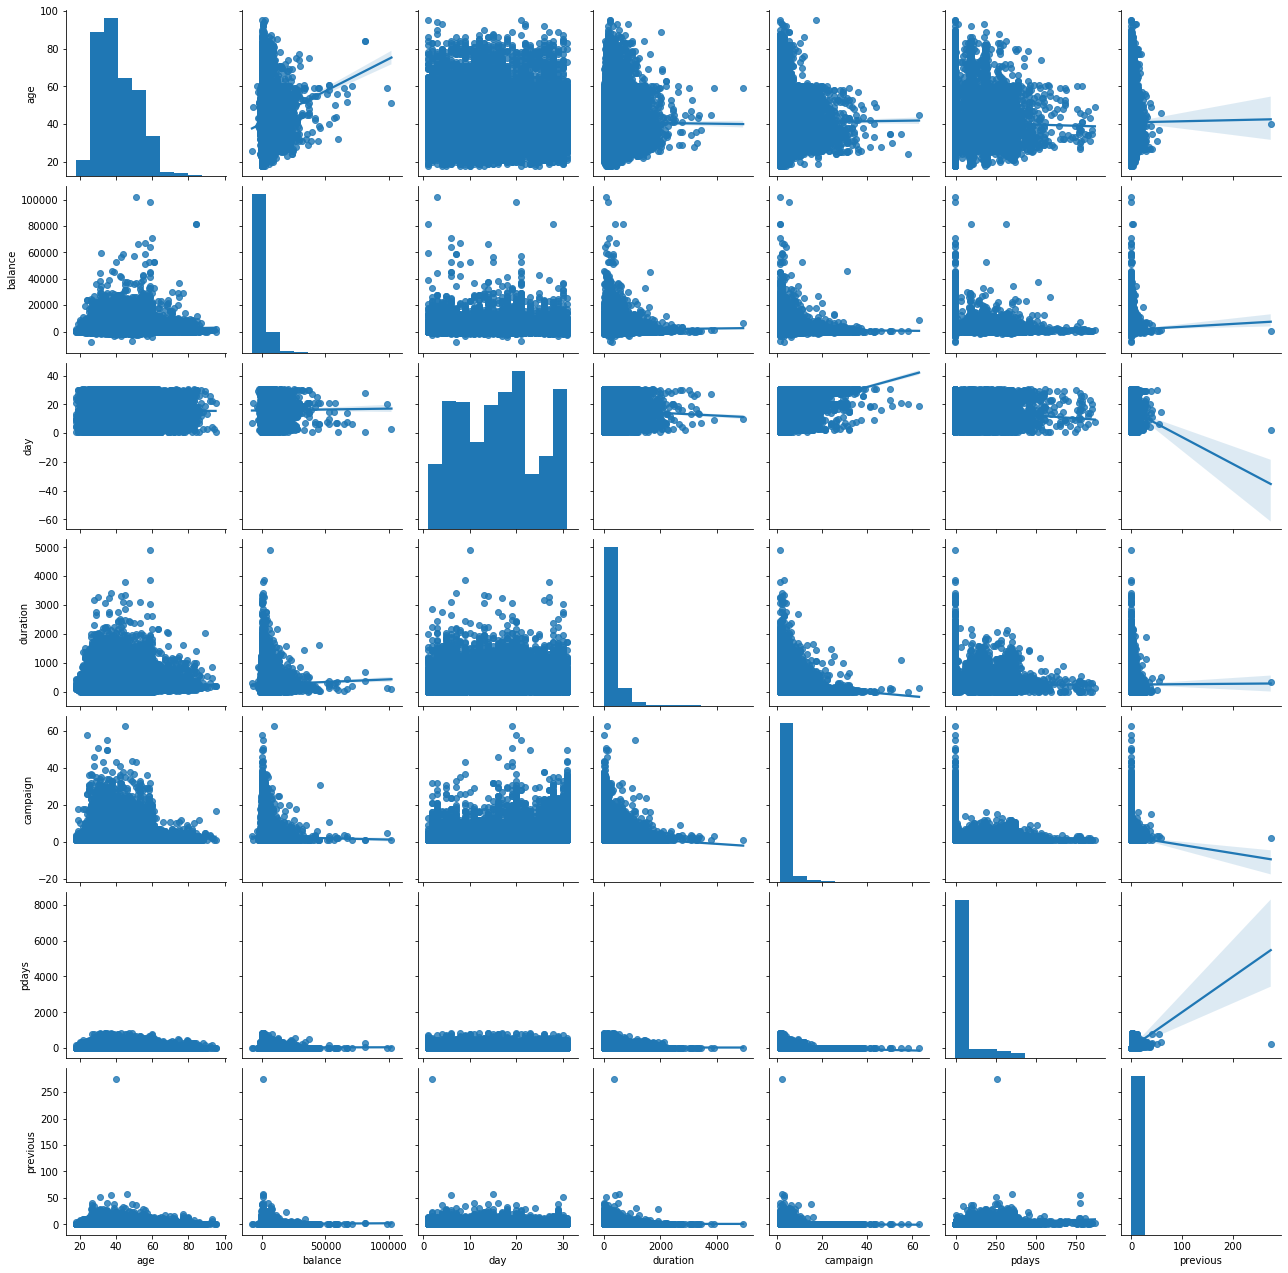

In [332]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension

sns.pairplot(df, kind="reg")
plt.show()

# This shows there is a lot of concentration of data towrds the right of the graph and then there is some linearity in data.

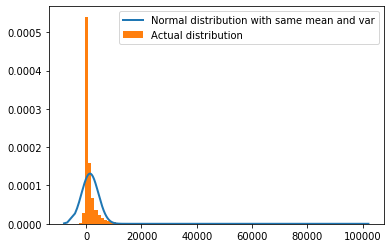

In [333]:
# Histogram for checking the Skewness

import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['balance'])
h = sorted(h)

#use spicy stats module to fit a normal distribution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

#plot both series on the histogram
plt.plot(h,fit ,'-',linewidth=2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins=100,label="Actual distribution")
plt.legend()
plt.show()

In [63]:
# Data is Skewed mostly towards the right.

#### Prepare the data for analytics – (10 marks)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [181]:
# Preparing data 
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [182]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

In [183]:
# Converting string values into categorical
df['loan'] = df['loan'].astype('category')

In [226]:
df['Target'] = df['Target'].astype('category')

In [227]:
df['job'] = df['job'].astype('category')

In [228]:
df['marital'] = df['marital'].astype('category')

In [229]:
df['education'] = df['education'].astype('category')

In [230]:
df['default'] = df['default'].astype('category')

In [232]:
df['housing'] = df['housing'].astype('category')

In [233]:
df['contact'] = df['contact'].astype('category')

In [234]:
df['month'] = df['month'].astype('category')

In [235]:
df['poutcome'] = df['poutcome'].astype('category')

In [185]:
# Converting categorical values into numbers
df['loan'] = df['loan'].cat.codes

In [237]:
df['Target'] = df['Target'].cat.codes

In [238]:
df['job'] = df['job'].cat.codes

In [239]:
df['marital'] = df['marital'].cat.codes

In [240]:
df['education'] = df['education'].cat.codes

In [241]:
df['default'] = df['default'].cat.codes

In [242]:
df['housing'] = df['housing'].cat.codes

In [243]:
df['contact'] = df['contact'].cat.codes

In [244]:
df['month'] = df['month'].cat.codes

In [245]:
df['poutcome'] = df['poutcome'].cat.codes

In [187]:
df['loan'].unique()

array([0, 1], dtype=int8)

In [236]:
df['Target'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [247]:
df['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8], dtype=int8)

In [248]:
df['marital'].unique()

array([1, 2, 0], dtype=int8)

In [249]:
df['education'].unique()

array([2, 1, 3, 0], dtype=int8)

In [250]:
df['default'].unique()

array([0, 1], dtype=int8)

In [251]:
df['housing'].unique()

array([1, 0], dtype=int8)

In [252]:
df['contact'].unique()

array([2, 0, 1], dtype=int8)

In [253]:
df['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11], dtype=int8)

In [254]:
df['poutcome'].unique()

array([3, 0, 1, 2], dtype=int8)

In [255]:
# Displaying and checking datatypes of all the 17 columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  Target     45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [256]:
# We will use 70% of data for training and 30% for testing.

X = df.drop('day',axis=1)     # Predictor feature columns (8 X m)
Y = df['day']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.shape, x_test.shape

((31647, 16), (13564, 16))

In [257]:
x_train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
6149,32,1,1,1,1,-238,1,0,2,8,427,1,-1,0,3,0
12403,34,0,2,1,0,-478,1,1,2,6,111,4,-1,0,3,0
21645,32,9,1,1,0,266,1,0,0,1,168,2,-1,0,3,0
29580,36,1,1,1,1,13,0,1,0,3,150,4,-1,0,3,0
31245,23,8,2,1,0,486,0,0,0,7,87,1,-1,0,3,0
32032,82,3,1,0,0,2140,0,0,1,0,118,6,-1,0,3,0
18295,45,4,1,2,0,385,0,1,0,5,12,16,-1,0,3,0
42774,36,4,1,2,0,3949,0,0,0,4,130,2,-1,0,3,1
26345,32,1,0,1,0,658,0,0,0,9,173,2,-1,0,3,0
31747,39,7,2,1,0,600,0,0,0,0,277,1,-1,0,3,0


In [201]:
# Lets check the split

In [334]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [335]:
# levels of y variables
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#### Create the ensemble model  – (30 marks)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [296]:
# We build the Logistic Regression model

import statsmodels.api as sm
lg = sm.OLS(Y, X.astype(float)).fit()
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    day   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                          1.019e+04
Date:                Thu, 03 Sep 2020   Prob (F-statistic):                        0.00
Time:                        17:06:31   Log-Likelihood:                     -1.5995e+05
No. Observations:               45211   AIC:                                  3.199e+05
Df Residuals:                   45195   BIC:                                  3.201e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0985      0.003     30.430      0.000       0.092       0.105
job            0.1147      0.012      9.464      0.000       0.091       0.138
marital        1.0957      0.064     17.029      0.000       0.970       1.222
education      0.6615      0.053     12.554      0.000       0.558       0.765
default        0.4159      0.296      1.405      0.160      -0.164       0.996
balance     1.623e-05   1.31e-05      1.242      0.214   -9.38e-06    4.18e-05
housing        0.5597      0.085      6.612      0.000       0.394       0.726
loan           0.5041      0.108      4.684      0.000       0.293       0.715
contact       -0.8077      0.050    -16.129      0.000      -0.906      -0.710
month          0.2526      0.014     17.771      0.000       0.225       0.280
duration       0.0003      0.000      1.803      0.071    -2.6e-05       0.001
campaign       0.4756      0.013     37.219      0.000       0.451       0.501
pdays          0.0113      0.001     17.679      0.000       0.010       0.013
previous       0.0557      0.019      2.867      0.004       0.018       0.094
poutcome       2.3053      0.060     38.531      0.000       2.188       2.423
Target        -0.5909      0.137     -4.314      0.000      -0.859      -0.322
==============================================================================
Omnibus:                     6109.534   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1606.116
Skew:                           0.117   Prob(JB):                         0.00
Kurtosis:                       2.107   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
# Here for most of the variables including the target variables P>|t| values is less than 0.5 so our model is good and correctly predicted

In [298]:
# Verifying all the coef 
lg.params

age          0.098469
job          0.114659
marital      1.095660
education    0.661472
default      0.415870
balance      0.000016
housing      0.559734
loan         0.504116
contact     -0.807716
month        0.252557
duration     0.000298
campaign     0.475650
pdays        0.011341
previous     0.055654
poutcome     2.305290
Target      -0.590893
dtype: float64

In [299]:
# Calculating the odds ratio and probablity from the coef 

lgcoef = pd.DataFrame(lg.params, columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [301]:
lgcoef

,coef,Odds_ratio,probability,pval
age,0.10,1.10,0.52,0.00
job,0.11,1.12,0.53,0.00
marital,1.10,2.99,0.75,0.00
education,0.66,1.94,0.66,0.00
default,0.42,1.52,0.60,0.16
balance,0.00,1.00,0.50,0.21
housing,0.56,1.75,0.64,0.00
loan,0.50,1.66,0.62,0.00
contact,-0.81,0.45,0.31,0.00
month,0.25,1.29,0.56,0.00


In [302]:
# There is a 31% probablity for people contacted to invest in Term Deposit Sales

In [303]:
from sklearn.metrics import confusion_matrix,accuracy_score

logreg = LogisticRegression(random_state=30)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=30, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [305]:
y_predict =logreg.predict(x_test)

In [306]:
# getting confusion matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True, fmt='.2f',  xticklabels = [0,1], yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.06468227636110847

Testing accuracy 0.06097021527572987

Confusion Matrix


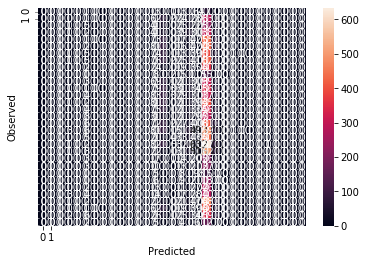

None


In [308]:
print("Training accuracy",logreg.score(x_train,y_train))
print('')
print("Testing accuracy",logreg.score(x_test,y_test))
print('')
print("Confusion Matrix")
print(draw_cm(y_test, y_predict))

In [309]:
# Here training accurancy is greater than testing accuracy. And we want testing accurancy greater than training accuracy.

In [310]:
# We need to make the accuracy better.
# Checking parameters for logistic regression.

logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 30,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [311]:
# Choosing any one 
model = LogisticRegression(random_state=30, penalty = 'l1', solver = 'liblinear', class_weight ='balanced')

model.fit(x_train,y_train)
y_predict = model.predict(x_test)

print("Training accuracy", model.score(x_train,y_train))
print("Testing accuracy", model.score(x_test,y_test))

Training accuracy 0.0827250608272506
Testing accuracy 0.07401946328516662


In [336]:
# Testing Accuracy is greater than training accuracy here, which is good for the model

In [284]:
# Building models for Decision Tree

model_gini = DecisionTreeClassifier(criterion='entropy')

In [289]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [290]:
# Printing the accuracy of the model
# Performance on training data is 100%
model_gini.score(x_train,y_train)

1.0

In [291]:
# Performance on test data is 13%
model_gini.score(x_test,y_test) 

0.13403125921557063

In [294]:
# Pruning Data
df_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=6, min_samples_leaf=6)

print(df_pruned.fit(x_train, y_train))
print(df_pruned.score(x_test,y_test))  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')
0.1568858743733412


In [338]:
# Now the accuracy of the test data has gone to 15%

In [351]:
# From visualizing the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [355]:
dot_data = StringIO()
export_graphviz(model_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getValue())
graph.write_png('gini.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

In [354]:
dot_data = StringIO()
export_graphviz(df_pruned, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getValue())
graph.write_png('df_pruned.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

In [358]:
pre_pruned = df_pruned.predict(x_test)
pre_pruned_train = df_pruned.predict(x_train)

In [359]:
print(accuracy_score(y_test,pre_pruned))
print(accuracy_score(y_train,pre_pruned_train))

0.1568858743733412
0.1698107245552501


In [362]:
acc = accuracy_score(y_test,pre_pruned)
acc

0.1568858743733412

In [363]:
# Here the accuracy score is 15% from the test data as before.

In [366]:
# We now calculate the feature importance where the tree is regularized. This reduces overfitting.

fea_imp = df_pruned.tree_.compute_feature_importances(normalize=True)

fea_imp_dict=dict(zip(feature_cols, df_pruned.fea_imp_))
fea_imp = pd.DataFrame.from_dict(fea_imp_dict, orient='index')
fea_imp.sort_values(by=0, ascending=False)

NameError: name 'feature_cols' is not defined

In [369]:
# From the feature importance now we can infer what impacts the target
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy':acc})
results = results[['Method','accuracy']]
results

,Method,accuracy
0,Decision Tree,0.16


In [374]:
# Accuracy with Decision tree here is 16%.

In [382]:
# Applying Random Forest models

from sklearn.ensemble import RandomForestClassifier

randcl = RandonForestClassifier(n_estimators = 20)
randcl = randcl.fit (x_train, y_train)

pred_RF = randcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDF = pd.DataFrame({'Method':['Decision Tree'], 'accuracy':acc_RF})
results = pd.concat([results,tempResultsDF])
results = results[['Method','accuracy']]
results

ImportError: cannot import name 'parallel_helper' from 'sklearn.utils.fixes' (C:\Users\Prachi\Anaconda3\lib\site-packages\sklearn\utils\fixes.py)

In [383]:
confusion_matrix(y_test, pred_RF)

NameError: name 'pred_RF' is not defined

In [ ]:
# The Random Forest, Bagging and Bossting Packages are not working for me, getting error as above. 
# Tried to follow Mentored Learning Sessions and some google solutions and installed some packages but did not work. :(